In [ ]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from google.colab import files




In [ ]:
#load the dataset file to colab
uploaded_file = files.upload()

file_name = next(iter(uploaded_file))
model = pd.read_csv(file_name, on_bad_lines='skip')

# Display the first few rows of the dataset
print(model.head())

Saving books.csv to books (4).csv
   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors  average_rating        isbn         isbn13  \
0  J.K. Rowling/Mary GrandPré            4.57  0439785960  9780439785969   
1  J.K. Rowling/Mary GrandPré            4.49  0439358078  9780439358071   
2                J.K. Rowling            4.42  0439554896  9780439554893   
3  J.K. Rowling/Mary GrandPré            4.56  043965548X  9780439655484   
4  J.K. Rowling/Mary GrandPré            4.78  0439682584  9780439682589   

  language_code    num_pages  ratings_count  text_reviews_count  \
0           eng          652        2095690              

In [ ]:
#check for the null values
model.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [ ]:
#dataset information
model.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


<ipython-input-38-8891aeccd7fc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="average_rating", y="title", data=data1, palette='coolwarm')


Text(0, 0.5, 'Book Title')

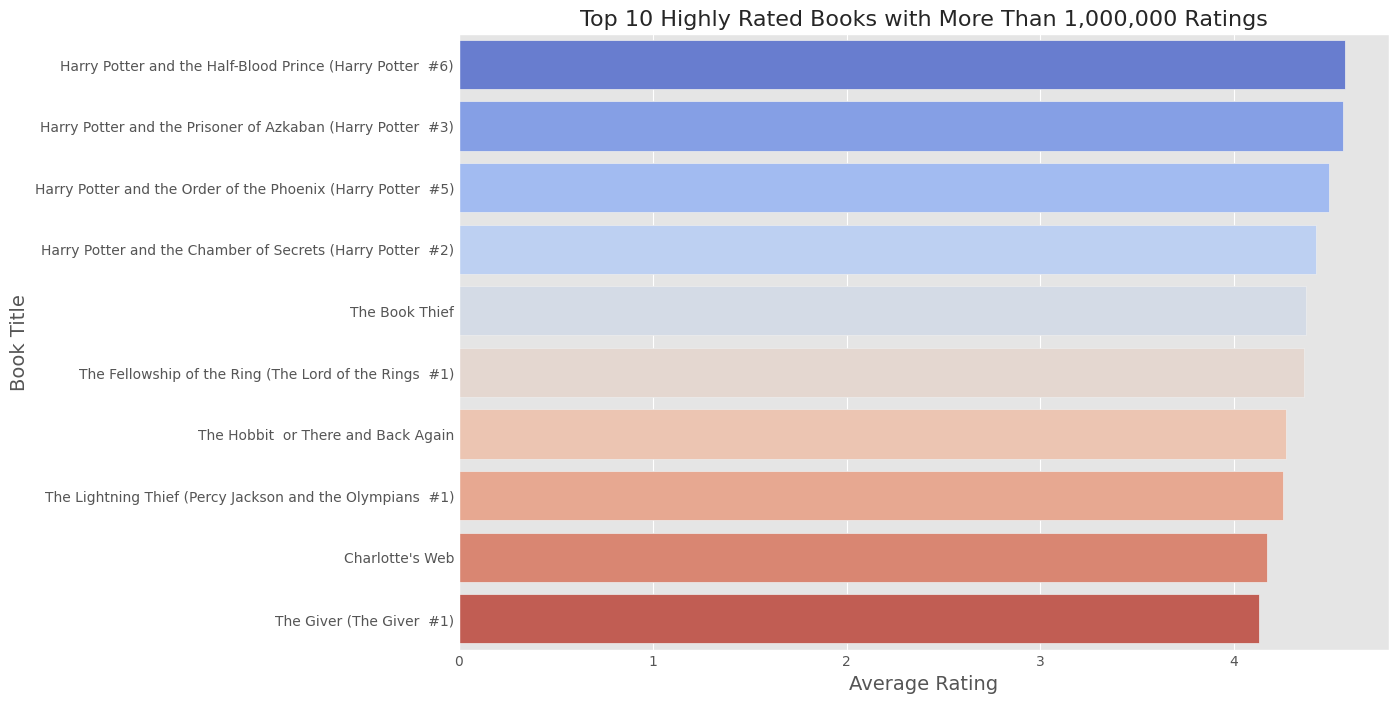

In [ ]:
top_ten = model[model['ratings_count'] > 1000000]
top_ten = top_ten.sort_values(by='average_rating', ascending=False)

# Change the plot style and colors
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))

# Use a different color palette and plot style
data1 = top_ten.sort_values(by='average_rating', ascending=False).head(10)
sns.barplot(x="average_rating", y="title", data=data1, palette='coolwarm')

# Set title and labels for better readability
plt.title("Top 10 Highly Rated Books with More Than 1,000,000 Ratings", fontsize=16)
plt.xlabel("Average Rating", fontsize=14)
plt.ylabel("Book Title", fontsize=14)



<ipython-input-39-cd4c4db0a1ed>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=most_books['title'], y=most_books.index, palette='inferno')


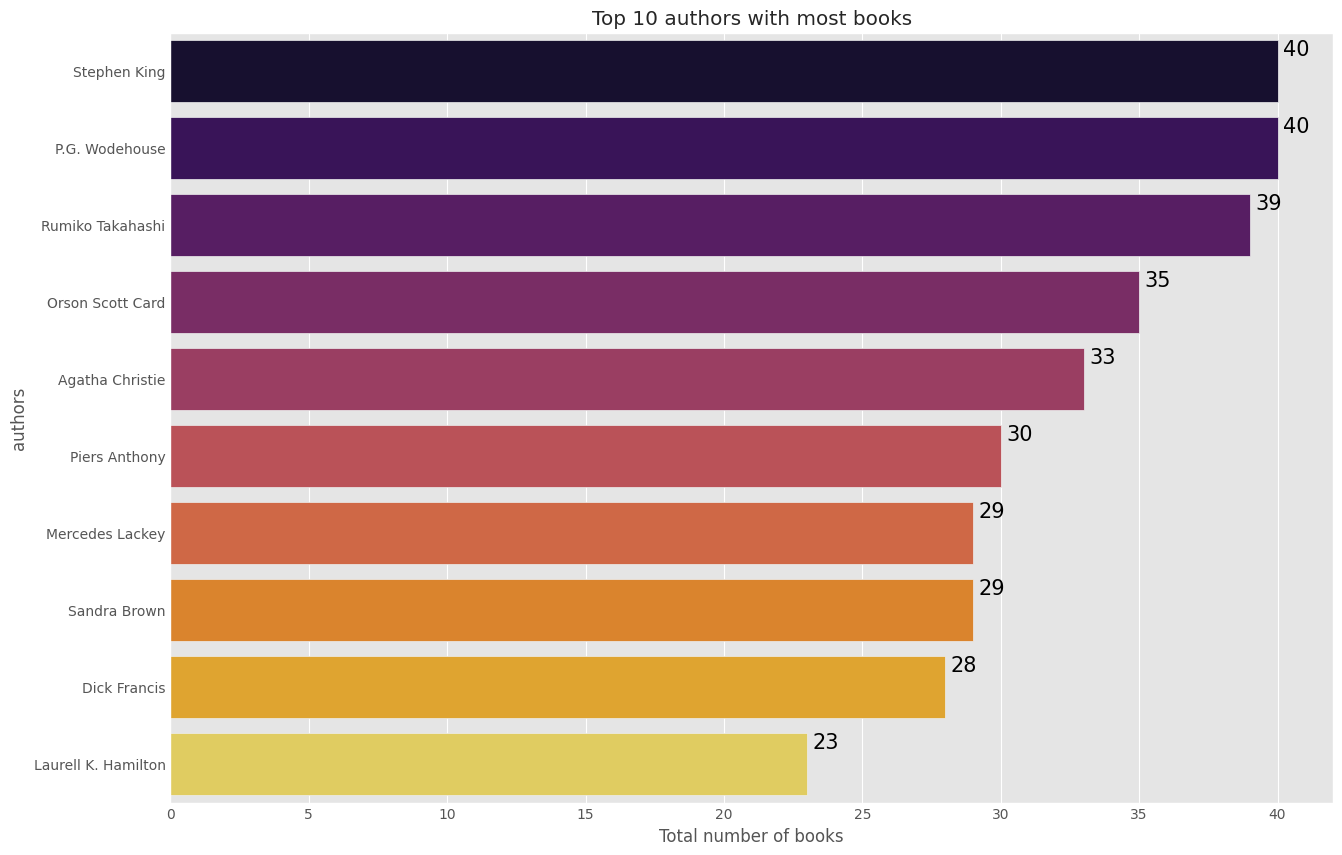

In [ ]:
# Group by authors and count the number of books each has written
most_books = model.groupby('authors')['title'].count().reset_index()

# Sort authors by the number of books in descending order and select the top 10
most_books = most_books.sort_values('title', ascending=False).head(10).set_index('authors')

# Plot the data
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=most_books['title'], y=most_books.index, palette='inferno')

# Set plot title and labels
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")

# Add numerical labels to the bars
for i in ax.patches:
    ax.text(i.get_width() + 0.2, i.get_y() + 0.2, str(int(i.get_width())), fontsize=15, color='black')

# Show the plot
plt.show()


<ipython-input-40-a485322b65b7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ratings_count', y='title', data=most_rated, palette='inferno')


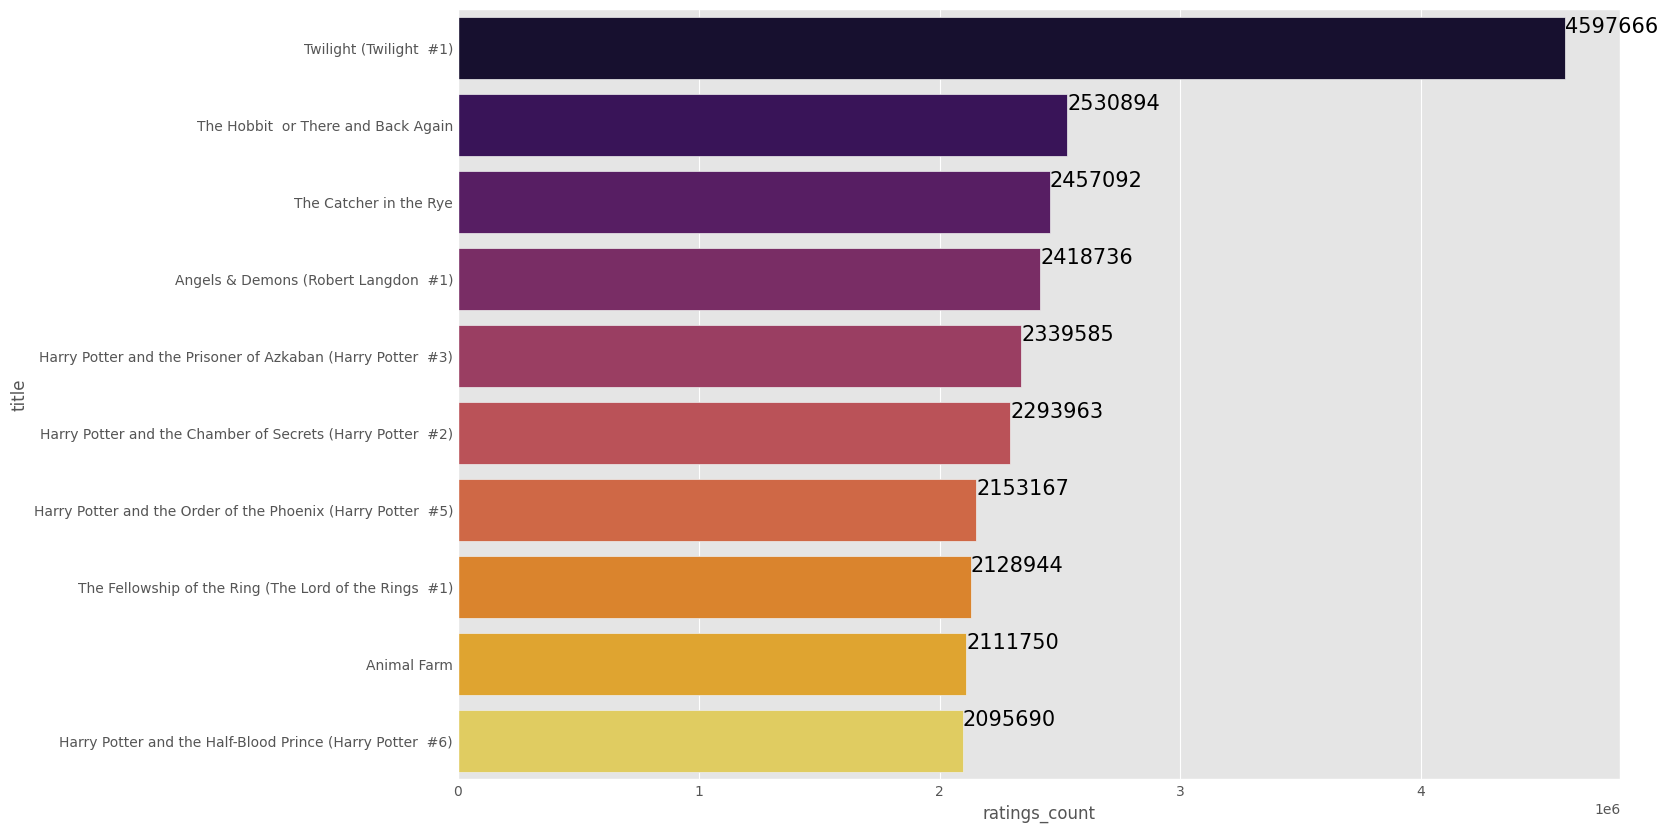

In [ ]:
# Select top 10 most rated books
most_rated = model.sort_values('ratings_count', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='ratings_count', y='title', data=most_rated, palette='inferno')

# Add numerical labels to the bars
for i in ax.patches:
    ax.text(i.get_width() + 0.2, i.get_y() + 0.2, str(int(i.get_width())), fontsize=15, color='black')

# Show the plot
plt.show()


In [ ]:
#make copy of the model to cam divide in rating groups
model2 = model.copy()

In [ ]:
# Categorize books into different rating groups and create a new column 'rating_between' for these categories

model2.loc[(model2['average_rating'] >= 0) & (model2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
model2.loc[(model2['average_rating'] > 1) & (model2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
model2.loc[(model2['average_rating'] > 2) & (model2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
model2.loc[(model2['average_rating'] > 3) & (model2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
model2.loc[(model2['average_rating'] > 4) & (model2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"


In [ ]:
#step im generate the feature vector by divide the rating groups into sperated coloums
rating_data = pd.get_dummies(model2['rating_between'])
language_data = pd.get_dummies(model2['language_code'])

In [ ]:
#constructing the feature vector
features = pd.concat([rating_data,
                     language_data,
                     data2['average_rating'],
                     data2['ratings_count']], axis=1)

In [ ]:
#construct the new featiure vector
min_max_scaler = MinMaxScaler()
features_new = min_max_scaler.fit_transform(features)

In [ ]:
#build the model
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features_new)
dist, idlist = model.kneighbors(features_new)

In [ ]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = data2[data2['title'] == book_name].index
    book_id = book_id[0]
    for new_id in idlist[book_id]:
        book_list_name.append(data2.loc[new_id].title)
    return book_list_name

BookNames = BookRecommender('The Lord of the Rings')
print(BookNames)

['The Lord of the Rings', '1968: War and Democracy', "Children's Christmas Stories and Poems: In Easy-to-Read Type", 'Thucydides  Book 6 Commentary', 'The Play Soldier', 'Interviews with John Kenneth Galbraith (Conversations with Public Intellectuals)']
